# Customer Segmentation and Sentiment Analysis
This notebook loads the dataset, cleans review text, performs sentiment analysis, and runs K-means clustering to identify customer segments.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("vader_lexicon")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/randalburks/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"[^a-z\s]", "", text)
        text = re.sub(r"\s+", " ", text).strip()
        return text
    return ""


In [5]:
df["Cleaned_Review"] = df["Review Text"].apply(clean_text)
df[["Review Text", "Cleaned_Review"]].head()


,Review Text,Cleaned_Review
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened to ...
2,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    if text:
        score = sia.polarity_scores(text)
        return score["compound"]
    return 0.0

df["Sentiment"] = df["Cleaned_Review"].apply(get_vader_sentiment)
df[["Cleaned_Review", "Sentiment"]].head()




,Cleaned_Review,Sentiment
0,absolutely wonderful silky and sexy and comfor...,0.8932
1,love this dress its sooo pretty i happened to ...,0.9719
2,i had such high hopes for this dress and reall...,0.9398
3,i love love love this jumpsuit its fun flirty ...,0.4805
4,this shirt is very flattering to all due to th...,0.9162


In [7]:
features = df[["Age", "Rating", "Positive Feedback Count"]].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
features["Cluster"] = labels
features.head()


,Age,Rating,Positive Feedback Count,Cluster
0,33,4,0,0
1,34,5,4,0
2,60,3,0,2
3,50,5,0,2
4,47,5,6,2


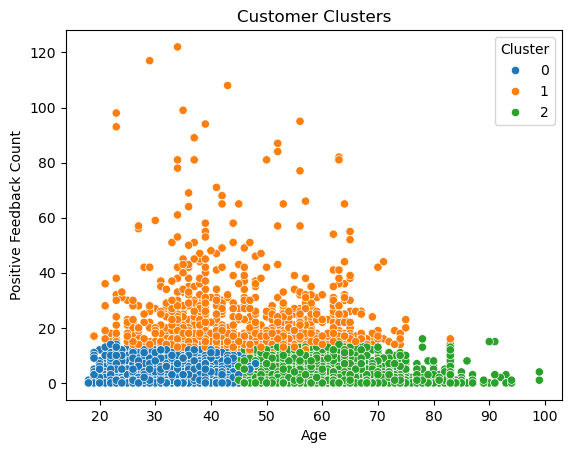

In [8]:
sns.scatterplot(data=features, x="Age", y="Positive Feedback Count", hue="Cluster", palette="tab10")
plt.title("Customer Clusters")
plt.show()


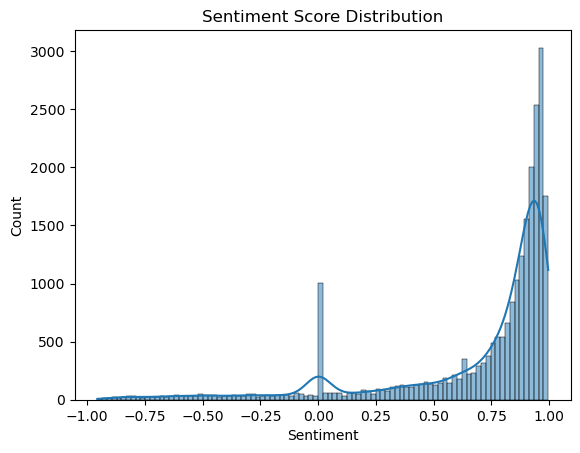

In [9]:
sns.histplot(df["Sentiment"], kde=True)
plt.title("Sentiment Score Distribution")
plt.show()


## Sentiment by Cluster

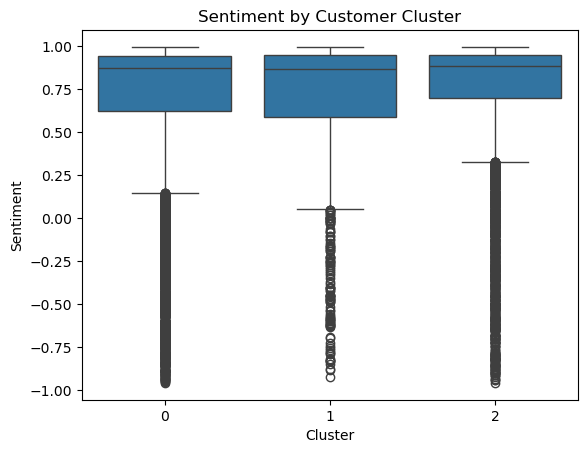

In [11]:
merged_df = df[["Cleaned_Review", "Sentiment"]].join(features["Cluster"])
sns.boxplot(data=merged_df, x="Cluster", y="Sentiment")
plt.title("Sentiment by Customer Cluster")
plt.show()


## Average Rating by Cluster

/var/folders/j9/y9drl51s2gvbm203cbmk7py80000gn/T/ipykernel_32258/1545066544.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster_ratings, x="Cluster", y="Rating", ci=None)


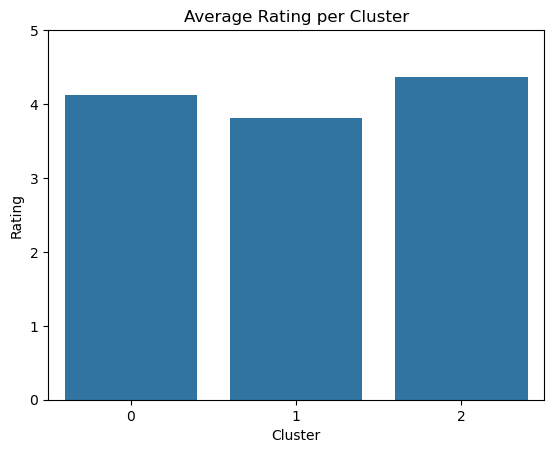

In [13]:
cluster_ratings = df[["Rating"]].join(features["Cluster"])
sns.barplot(data=cluster_ratings, x="Cluster", y="Rating", ci=None)
plt.title("Average Rating per Cluster")
plt.ylim(0, 5)
plt.show()
